     2. Get the data

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(open("F:\Sem 3\EE-258\Homework\Advertising.csv"), header=0,index_col=0)
df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB
        TV  radio  newspaper  sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
6      8.7   48.9       75.0    7.2
7     57.5   32.8       23.5   11.8
8    120.2   19.6       11.6   13.2
9      8.6    2.1        1.0    4.8
10   199.8    2.6       21.2   10.6
11    66.1    5.8       24.2    8.6
12   214.7   24.0        4.0   17.4
13    23.8   35.1       65.9    9.2
14    97.5    7.6        7.2    9.7
15   204.1   32.9       46.0   19.0
16   195.4   47.7       52.9   22.4
17    67.8   36.6      114.0   12.5
18   281.4   39.6       55.8   24.4
19    69.2   20.5       18.3   11.3


      3. Linear regression using Normal Equations for a single feature:

      a. Find the linear regression coefficient using normal equations assuming TV as the feature (input) and sales as the output variable.

In [2]:
X = df.drop(['newspaper','sales','radio'],axis=1)
y = df.drop(['newspaper','TV','radio'],axis=1)

from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,random_state = 10)
X_train.shape

y1 = Y_train
x1 = X_train

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from sklearn.linear_model import LinearRegression

linereg = LinearRegression()

linereg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
print (linereg.intercept_)
print (linereg.coef_)

[ 7.1694064]
[[ 0.04590358]]


In [5]:
y_pred = linereg.predict(X_test)
print(y_pred)

[[ 16.84129141]
 [  7.56876758]
 [ 17.194749  ]
 [ 20.18766263]
 [ 17.10294183]
 [ 13.93100422]
 [ 15.8176415 ]
 [ 16.29962912]
 [ 17.12130326]
 [  7.95894804]
 [ 20.46767449]
 [ 10.20363326]
 [  7.94517696]
 [ 17.29114652]
 [ 17.70427877]
 [ 11.88370441]
 [ 18.89318158]
 [  7.41728575]
 [ 18.26430249]
 [ 16.57964098]
 [ 15.79009935]
 [  7.20153891]
 [ 19.16401272]
 [ 12.25093308]
 [ 20.03159044]
 [  8.03239377]
 [  8.34453814]
 [  9.21211586]
 [ 18.18167604]
 [  8.06911664]
 [ 13.21490833]
 [ 17.6354234 ]
 [  8.43175495]
 [  8.48224889]
 [ 20.51357807]
 [ 19.8709279 ]
 [ 10.85087379]
 [ 20.21979514]
 [ 11.28695783]
 [ 17.37836333]]


In [6]:
import numpy.linalg
X_b = np.c_[np.ones((160, 1)), X_train] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y_train)
theta_best

array([[ 7.1694064 ],
       [ 0.04590358]])

In [7]:
X_new_b = np.c_[np.ones((40, 1)), X_test] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print(y_predict)
print(Y_test.values)

[[ 16.84129141]
 [  7.56876758]
 [ 17.194749  ]
 [ 20.18766263]
 [ 17.10294183]
 [ 13.93100422]
 [ 15.8176415 ]
 [ 16.29962912]
 [ 17.12130326]
 [  7.95894804]
 [ 20.46767449]
 [ 10.20363326]
 [  7.94517696]
 [ 17.29114652]
 [ 17.70427877]
 [ 11.88370441]
 [ 18.89318158]
 [  7.41728575]
 [ 18.26430249]
 [ 16.57964098]
 [ 15.79009935]
 [  7.20153891]
 [ 19.16401272]
 [ 12.25093308]
 [ 20.03159044]
 [  8.03239377]
 [  8.34453814]
 [  9.21211586]
 [ 18.18167604]
 [  8.06911664]
 [ 13.21490833]
 [ 17.6354234 ]
 [  8.43175495]
 [  8.48224889]
 [ 20.51357807]
 [ 19.8709279 ]
 [ 10.85087379]
 [ 20.21979514]
 [ 11.28695783]
 [ 17.37836333]]
[[ 18.4]
 [  7.2]
 [ 18. ]
 [ 25.5]
 [ 22.6]
 [ 14.6]
 [ 14.9]
 [ 23.7]
 [ 22.3]
 [  9.3]
 [ 25.4]
 [  8.6]
 [  8.7]
 [ 20.1]
 [ 19.7]
 [ 14. ]
 [ 19.8]
 [  5.3]
 [ 21.8]
 [ 22.6]
 [ 15.6]
 [  1.6]
 [ 24.2]
 [ 16. ]
 [ 14.8]
 [  7. ]
 [  9.5]
 [ 10.4]
 [ 23.2]
 [  7.6]
 [ 12.9]
 [ 21.5]
 [  6.9]
 [  7.3]
 [ 12.8]
 [ 11.8]
 [  8.8]
 [ 15. ]
 [ 10.6]
 [ 11.5]

        Have compared the normal equations and using inbuilt library function

       b. Display data points (sales vs TV)
       c. On the same figure, display the regression line.

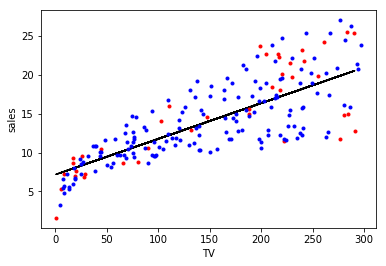

red for test data and blue for training data


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('TV')
plt.ylabel('sales')
plt.plot(X_test, y_predict, "k-")
plt.plot(X_test, Y_test, "r.")
plt.plot(X_train, Y_train, "b.")
plt.show()
print("red for test data and blue for training data")

     d. Repeat parts a-b for replacing TV with radio and newspaper.

           Radio

In [9]:
radio = df.drop(['TV','sales','radio'],axis=1)
radio_sales = df.drop(['newspaper','TV','radio'],axis=1)

from sklearn.cross_validation import train_test_split
radio1_train, radio1_test, radio2_train, radio2_test = train_test_split(radio,radio_sales,test_size=0.2,random_state = 10)

radio1_train = radio1_train.values
radio2_train = radio2_train.values

radio_b = np.c_[np.ones((160, 1)), radio1_train] # add x0 = 1 to each instance
theta_radio = np.linalg.inv(radio_b.T.dot(radio_b)).dot(radio_b.T).dot(radio2_train)
print(theta_radio)

[[ 12.15136156]
 [  0.05589846]]


In [10]:
radio_new_b = np.c_[np.ones((40, 1)), radio2_test] # add x0 = 1 to each instance
radio_predict = radio_new_b.dot(theta_radio)
print(radio_predict)

[[ 13.1798932 ]
 [ 12.55383046]
 [ 13.15753382]
 [ 13.57677226]
 [ 13.41466673]
 [ 12.96747906]
 [ 12.9842486 ]
 [ 13.47615504]
 [ 13.3978972 ]
 [ 12.67121723]
 [ 13.57118242]
 [ 12.6320883 ]
 [ 12.63767815]
 [ 13.27492058]
 [ 13.2525612 ]
 [ 12.93393998]
 [ 13.25815105]
 [ 12.44762339]
 [ 13.36994797]
 [ 13.41466673]
 [ 13.02337752]
 [ 12.24079909]
 [ 13.50410427]
 [ 13.0457369 ]
 [ 12.97865875]
 [ 12.54265077]
 [ 12.68239692]
 [ 12.73270553]
 [ 13.44820581]
 [ 12.57618985]
 [ 12.87245168]
 [ 13.35317843]
 [ 12.53706092]
 [ 12.55942031]
 [ 12.86686183]
 [ 12.81096337]
 [ 12.643268  ]
 [ 12.98983844]
 [ 12.74388522]
 [ 12.79419384]]


In [11]:
from sklearn.linear_model import LinearRegression

radio2 = LinearRegression()

radiomodel = radio2.fit(radio1_train,radio2_train)
radio_predict = radio2.predict(radio2_test)
radio_predict[:]
radiomodel.intercept_

array([ 12.15136156])

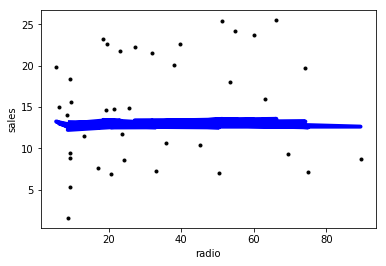

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('radio')
plt.ylabel('sales')
plt.plot(radio1_test, radio2_test, "k.")
plt.plot(radio1_test, radio_predict, "b-",linewidth=4)
plt.show()

        Newspaper

In [13]:
news = df.drop(['TV','sales','newspaper'],axis=1)
news_sales = df.drop(['newspaper','TV','radio'],axis=1)

from sklearn.cross_validation import train_test_split
news1_train, news1_test, news2_train, news2_test = train_test_split(news,news_sales,test_size=0.1,random_state = 5)

news1_train = news1_train.values
news2_train = news2_train.values

news_b = np.c_[np.ones((180, 1)), news1_train] # add x0 = 1 to each instance
theta_news = np.linalg.inv(news_b.T.dot(news_b)).dot(news_b.T).dot(news2_train)
print(theta_news)

[[ 9.24315403]
 [ 0.2046936 ]]


In [14]:
news_new_b = np.c_[np.ones((20, 1)), news2_test] # add x0 = 1 to each instance
news_predict = news_new_b.dot(theta_radio)
print(news_predict)

[[ 12.52029139]
 [ 12.94511968]
 [ 12.76065476]
 [ 12.71593599]
 [ 13.02337752]
 [ 12.79978368]
 [ 12.79978368]
 [ 12.81096337]
 [ 13.20784243]
 [ 12.84450245]
 [ 13.04014706]
 [ 12.68239692]
 [ 12.8500923 ]
 [ 13.07927598]
 [ 13.47615504]
 [ 13.30845966]
 [ 13.18548305]
 [ 13.35317843]
 [ 12.67680707]
 [ 12.75506491]]


In [15]:
from sklearn.linear_model import LinearRegression

news2 = LinearRegression()

newsmodel = news2.fit(news1_train,news2_train)
news_predict = news2.predict(news2_test)
print(newsmodel.intercept_)
news_predict[:]

[ 9.24315403]


array([[ 10.59413177],
       [ 12.14980311],
       [ 11.47431424],
       [ 11.31055936],
       [ 12.43637415],
       [ 11.61759976],
       [ 11.61759976],
       [ 11.65853848],
       [ 13.11186302],
       [ 11.78135463],
       [ 12.49778223],
       [ 11.1877432 ],
       [ 11.80182399],
       [ 12.64106774],
       [ 14.09439229],
       [ 13.48031149],
       [ 13.02998558],
       [ 13.64406637],
       [ 11.16727384],
       [ 11.45384488]])

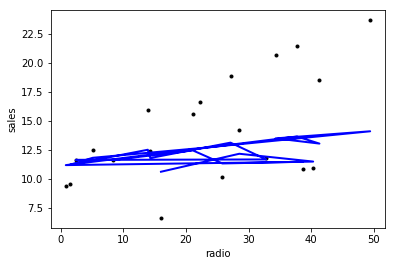

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('radio')
plt.ylabel('sales')
plt.plot(news1_test, news2_test, "k.")
plt.plot(news1_test, news_predict, "b-",linewidth=2)
plt.show()

        With radio and newspaper both

In [17]:
X2 = df.drop(['TV','sales'],axis=1)
y2 = df.drop(['newspaper','TV','radio'],axis=1)

from sklearn.cross_validation import train_test_split
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,y2,test_size=0.1,random_state = 10)
X2_train.shape

(180, 2)

In [18]:
x2 = X2_train.values
y2 = Y2_train.values
X2_b = np.c_[np.ones((180, 1)),x2] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X2_b.T.dot(X2_b)).dot(X2_b.T).dot(y2)
print(theta_best,theta_best.shape)

[[ 8.96510435]
 [ 0.19164563]
 [ 0.01696807]] (3, 1)


In [19]:
X2_new_b = np.c_[np.ones((20, 1)), X2_test] # add x0 = 1 to each instance
y2_predict = X2_new_b.dot(theta_best)
print(y2_predict)
print(Y2_test.values)

[[ 14.77645358]
 [ 19.60918113]
 [ 15.17978337]
 [ 18.13750724]
 [ 17.62866286]
 [ 13.86952513]
 [ 12.86827292]
 [ 19.45048288]
 [ 17.83987917]
 [ 18.93752623]
 [ 17.94047986]
 [ 10.48727634]
 [ 18.85696406]
 [ 15.97082926]
 [ 16.41428916]
 [ 14.78034688]
 [ 14.21369627]
 [ 14.85480864]
 [ 16.64129765]
 [ 17.94089659]]
[[ 18.4]
 [  7.2]
 [ 18. ]
 [ 25.5]
 [ 22.6]
 [ 14.6]
 [ 14.9]
 [ 23.7]
 [ 22.3]
 [  9.3]
 [ 25.4]
 [  8.6]
 [  8.7]
 [ 20.1]
 [ 19.7]
 [ 14. ]
 [ 19.8]
 [  5.3]
 [ 21.8]
 [ 22.6]]


In [20]:
from sklearn.linear_model import LinearRegression

linereg2 = LinearRegression()

model = linereg2.fit(X2_train,Y2_train)
predictions = linereg2.predict(X2_test)
predictions[:]

array([[ 14.77645358],
       [ 19.60918113],
       [ 15.17978337],
       [ 18.13750724],
       [ 17.62866286],
       [ 13.86952513],
       [ 12.86827292],
       [ 19.45048288],
       [ 17.83987917],
       [ 18.93752623],
       [ 17.94047986],
       [ 10.48727634],
       [ 18.85696406],
       [ 15.97082926],
       [ 16.41428916],
       [ 14.78034688],
       [ 14.21369627],
       [ 14.85480864],
       [ 16.64129765],
       [ 17.94089659]])

In [21]:
print (linereg2.intercept_)
print (linereg2.coef_)
print(linereg2.score(X2_train,Y2_train))

[ 8.96510435]
[[ 0.19164563  0.01696807]]
0.350288504113


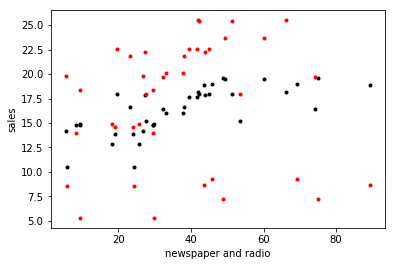

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('newspaper and radio')
plt.ylabel('sales')
plt.plot(X2_test, y2_predict, "k.")
plt.plot(X2_test, Y2_test, "r.")
plt.show()

      e. Discuss the complexity of the Normal Equations computation.

Ans. In normal equations we computed inverse of X transpose dot X where X is the features. Now if the number of features increase then the matrix size will increase, increasing the complexty of implementation. Generally computational complexity of inverting a matrix is typically about O(n2.4) to O(n3). So normal equations get very slow when there are many features. But normal equations are linear so if they fit in the memory then large training sets can be computed.

      4. Linear regression using Gradient Descent:

      a. Find the linear regression coefficient using gradient descent assuming TV as the feature (input) and sales as the output variable.

In [23]:
eta = 0.000001 # 1st learning rate
X4_b = np.c_[np.ones((160, 1)), x1] # add x0 = 1 to each instance
m = 160
theta = np.random.randn(2,1) # random initialization
print(y1.shape,X4_b.T.shape,X4_b.shape,theta.shape)
print(theta)

(160, 1) (2, 160) (160, 2) (2, 1)
[[ 0.05890525]
 [ 0.42823048]]


In [24]:
n_iterations = 10
for iteration in range(n_iterations):
    gradients = 2/m * X4_b.T.dot(X4_b.dot(theta) - y1)
    theta = theta - eta * gradients
    
print(theta)


[[ 0.05815379]
 [ 0.27839056]]


In [25]:
X_new_b = np.c_[np.ones((40, 1)), X_test]
y_predict3 = X_new_b.dot(theta)
y_predict3

array([[ 58.7150458 ],
       [  2.48015171],
       [ 60.85865315],
       [ 79.00971798],
       [ 60.30187202],
       [ 41.06508399],
       [ 52.50693621],
       [ 55.43003714],
       [ 60.41322825],
       [  4.84647151],
       [ 80.70790043],
       [ 18.45977013],
       [  4.76295434],
       [ 61.44327334],
       [ 63.94878842],
       [ 28.6488648 ],
       [ 71.15910405],
       [  1.56146284],
       [ 67.34515332],
       [ 57.12821959],
       [ 52.33990187],
       [  0.25302719],
       [ 72.80160839],
       [ 30.87598932],
       [ 78.06319006],
       [  5.29189641],
       [  7.18495225],
       [ 12.44653393],
       [ 66.8440503 ],
       [  5.51460886],
       [ 36.72219118],
       [ 63.53120258],
       [  7.71389433],
       [  8.02012395],
       [ 80.98629099],
       [ 77.08882308],
       [ 22.38507709],
       [ 79.20459138],
       [ 25.02978746],
       [ 61.97221541]])

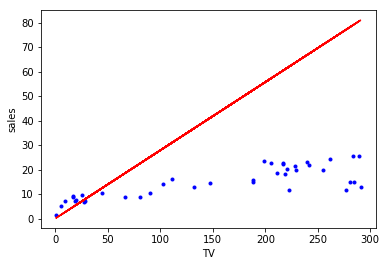

In [26]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.xlabel('TV')
plt.ylabel('sales')
plt.plot(X_test,Y_test,'b.')
plt.plot(X_test,y_predict3,'r-')
plt.show()

In [27]:
eta2 = 0.001 # 2nd learning rate
X4_b = np.c_[np.ones((160, 1)), x1] # add x0 = 1 to each instance
m = 160
theta2 = np.random.randn(2,1) # random initialization
print(y1.shape,X4_b.T.shape,X4_b.shape,theta.shape)

(160, 1) (2, 160) (160, 2) (2, 1)


In [28]:
n_iterations = 10
for iteration in range(n_iterations):
    gradients2 = 2/m * X4_b.T.dot(X4_b.dot(theta2) - y1)
    theta2 = theta2 - eta2 * gradients2
    
print(theta2)

[[  7.18550590e+13]
 [  1.37070690e+16]]


In [29]:
X_new_b = np.c_[np.ones((40, 1)), X_test]
y_predict4 = X_new_b.dot(theta)
y_predict4

array([[ 58.7150458 ],
       [  2.48015171],
       [ 60.85865315],
       [ 79.00971798],
       [ 60.30187202],
       [ 41.06508399],
       [ 52.50693621],
       [ 55.43003714],
       [ 60.41322825],
       [  4.84647151],
       [ 80.70790043],
       [ 18.45977013],
       [  4.76295434],
       [ 61.44327334],
       [ 63.94878842],
       [ 28.6488648 ],
       [ 71.15910405],
       [  1.56146284],
       [ 67.34515332],
       [ 57.12821959],
       [ 52.33990187],
       [  0.25302719],
       [ 72.80160839],
       [ 30.87598932],
       [ 78.06319006],
       [  5.29189641],
       [  7.18495225],
       [ 12.44653393],
       [ 66.8440503 ],
       [  5.51460886],
       [ 36.72219118],
       [ 63.53120258],
       [  7.71389433],
       [  8.02012395],
       [ 80.98629099],
       [ 77.08882308],
       [ 22.38507709],
       [ 79.20459138],
       [ 25.02978746],
       [ 61.97221541]])

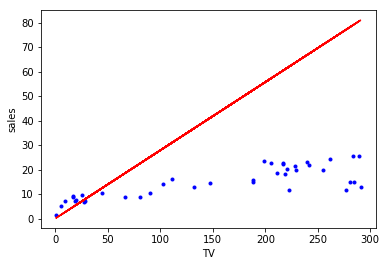

In [30]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.xlabel('TV')
plt.ylabel('sales')
plt.plot(X_test,Y_test,'b.')
plt.plot(X_test,y_predict4,'r-')
plt.show()

In [31]:
eta3 = 0.1 # 3rd learning rate
X6_b = np.c_[np.ones((160, 1)), x1] # add x0 = 1 to each instance
m = 160
theta3 = np.random.randn(2,1) # random initialization
print(y1.shape,X6_b.T.shape,X6_b.shape,theta.shape)

(160, 1) (2, 160) (160, 2) (2, 1)


In [32]:
n_iterations = 10
for iteration in range(n_iterations):
    gradients3 = 2/m * X6_b.T.dot(X6_b.dot(theta3) - y1)
    theta3 = theta2 - eta3 * gradients3
    
print(theta3)

[[ -3.51484283e+47]
 [ -6.70491319e+49]]


In [33]:
X_new_b = np.c_[np.ones((40, 1)), X_test]
y_predict6 = X_new_b.dot(theta)
y_predict6

array([[ 58.7150458 ],
       [  2.48015171],
       [ 60.85865315],
       [ 79.00971798],
       [ 60.30187202],
       [ 41.06508399],
       [ 52.50693621],
       [ 55.43003714],
       [ 60.41322825],
       [  4.84647151],
       [ 80.70790043],
       [ 18.45977013],
       [  4.76295434],
       [ 61.44327334],
       [ 63.94878842],
       [ 28.6488648 ],
       [ 71.15910405],
       [  1.56146284],
       [ 67.34515332],
       [ 57.12821959],
       [ 52.33990187],
       [  0.25302719],
       [ 72.80160839],
       [ 30.87598932],
       [ 78.06319006],
       [  5.29189641],
       [  7.18495225],
       [ 12.44653393],
       [ 66.8440503 ],
       [  5.51460886],
       [ 36.72219118],
       [ 63.53120258],
       [  7.71389433],
       [  8.02012395],
       [ 80.98629099],
       [ 77.08882308],
       [ 22.38507709],
       [ 79.20459138],
       [ 25.02978746],
       [ 61.97221541]])

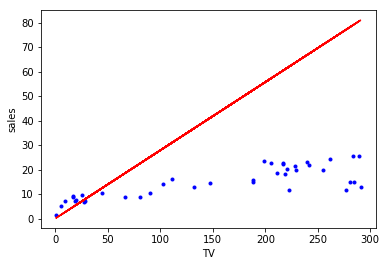

In [34]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.xlabel('TV')
plt.ylabel('sales')
plt.plot(X_test,Y_test,'b.')
plt.plot(X_test,y_predict4,'r-')
plt.show()

          5. Multiple linear regression:

        a. Use all three features (TV, radio, newspaper) and find a linear relation between the sales and all three features.

In [35]:
X5 = df.drop(['sales'],axis=1)
y5 = df.drop(['newspaper','TV','radio'],axis=1)

from sklearn.cross_validation import train_test_split
X5_train, X5_test, Y5_train, Y5_test = train_test_split(X5, y5, test_size=0.1,random_state = 10)
X5_train.shape

(180, 3)

In [36]:
x5 = X5_train.values
y5 = Y5_train.values
X5_b = np.c_[np.ones((180, 1)), x5] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X5_b.T.dot(X5_b)).dot(X5_b.T).dot(y5)
theta_best

array([[ 3.12945103],
       [ 0.04341271],
       [ 0.18859869],
       [ 0.00395567]])

In [37]:
X_new_b = np.c_[np.ones((20,1)),X5_test]
y_predict5 = X_new_b.dot(theta_best)
y_predict5

array([[ 17.87695771],
       [ 13.02629288],
       [ 18.04620294],
       [ 23.62430536],
       [ 20.54517098],
       [ 14.10720492],
       [ 14.82330664],
       [ 21.31835419],
       [ 20.92840289],
       [ 12.8069575 ],
       [ 23.88636744],
       [  7.18863063],
       [ 12.45852552],
       [ 19.11334956],
       [ 19.47791591],
       [ 13.20368504],
       [ 19.3121176 ],
       [  9.04016386],
       [ 20.88082435],
       [ 20.61238828]])

In [38]:
from sklearn import linear_model
clf = linear_model.SGDRegressor(eta0=0.000001,n_iter=10, penalty='none')# normal learning 
clf.fit(X5_train, Y5_train)

clf.predict(X5_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 16.75293923,   4.51217725,  18.5852188 ,  24.23827348,
        18.48632923,  12.19925325,  15.2256974 ,  18.06699765,
        18.21580791,   4.86681788,  24.24600525,   5.78174288,
         5.37612621,  18.45568971,  20.17890931,   8.78584294,
        19.84040876,   1.66944764,  19.73185296,  17.15918096])

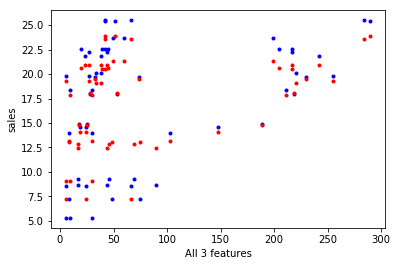

In [39]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.xlabel('All 3 features')
plt.ylabel('sales')
plt.plot(X5_test,Y5_test,'b.')
plt.plot(X5_test,y_predict5,'r.')
plt.show()

        b. Compare your results (cost and coefficients) with the results in Problem 3

    Ans. The coefficients in problem 3 are very different than in this problem.

       c. Interpret your results using the correlation coefficient matrix

In [40]:
corr_matrix = df.corr()
print (corr_matrix)

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


       7. Linear Regression using tensor-flow:

       a. Repeat Problem 5 using tensorflow

In [41]:
import tensorflow as tf

X = tf.constant(X5_b, dtype=tf.float32, name="X")
y = tf.constant(Y5_train.values.reshape(-1, 1), dtype=tf.float32, name="y")
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)

with tf.Session() as sess:
    theta_value = theta.eval()
    
print(theta_value)

[[ 3.12943363]
 [ 0.04341276]
 [ 0.18859901]
 [ 0.0039553 ]]


       b. Compare the results with Problem 5

Ans. The results are the same as problem 5 i.e. theta values are the same. But in tensorflow we got values much faster.

In [42]:
from sklearn.preprocessing import StandardScaler
m=200
n=3
Scaler1 = StandardScaler()
scalerdata = Scaler1.fit_transform(X5)
scalerdata1=np.c_[np.ones((m,1)),scalerdata]
y7 = df.sales
n_epochs= 1000

In [43]:
tf.reset_default_graph()

val_1 = tf.constant(scalerdata1, dtype=tf.float32, name="val_1")
val_2 = tf.constant(y7.values.reshape(-1, 1), dtype=tf.float32, name="val_2")
theta = tf.Variable(tf.random_uniform([n+1, 1], -1.0, 1.0),dtype=tf.float32, name="theta")

y_pred = tf.matmul(val_1, theta, name="predictions")
error = y_pred - val_2
mse = tf.reduce_mean(tf.square(error), name="mse")
gradients = 2/m * tf.matmul(tf.transpose(val_1), error)
training_op = tf.assign(theta, theta - learning_rate * gradients)


init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
            sess.run(training_op)
    best_theta = theta.eval()

NameError: name 'learning_rate' is not defined

         c. Visualize training stats using Tensor board

In [ ]:
now = datetime.utcnow().strftime('%Y%m%d%H%M%S')
root_logdir = 'tf_hw3'
logdir = '{}/run-{}'.format(root_logdir, now)

In [ ]:
mse_summary =tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [ ]:
m=180
with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, shape=[m,n], name="x-input") 

with tf.name_scope('input'):
    y = tf.placeholder(tf.float32, shape=[m,1], name="y-input")
    
with tf.name_scope("weights"):
    W = tf.Variable(tf.ones([n,1]))
    b = tf.Variable(tf.zeros([1]))

with tf.name_scope("Wx_b") as scope:
    y_ = tf.matmul(x,W)+b

with tf.name_scope("cost") as scope:
    loss = tf.reduce_mean(tf.square(y - y_))

with tf.name_scope('train') as scope:
    optimizer = tf.train.GradientDescentOptimizer(0.00001)
    train = optimizer.minimize(loss)

we = tf.summary.histogram("weights",W)
bi = tf.summary.histogram("biases",b)
lo = tf.summary.histogram("cost",loss)

merged = tf.summary.merge_all()
writer = tf.summary.FileWriter(logdir, sess.graph)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    vals = []
    
    for i in range(m):
        if i%10 == 0:
            result = we.eval(feed_dict={x:X5_train, y:Y5_train})
            writer.add_summary(result, i)
            result1 = bi.eval(feed_dict={x:X5_train, y:Y5_train})
            writer.add_summary(result1, i)
            result2 = bi.eval(feed_dict={x:X5_train, y:Y5_train})
            writer.add_summary(result2, i)
        else:
            val = sess.run([train,loss], feed_dict={x:X5_train, y:Y5_train})
            vals.append(val)
            W1 = sess.run(W)
            B1 = sess.run(b)